#### Linear Regression on the data of college acceptance
* y = f(x1, x2)
* data normalization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sklearn.preprocessing as prep

In [2]:
# load the data
fname = 'http://www-bcf.usc.edu/~gareth/ISL/College.csv'
X = pd.read_csv(fname, index_col = 0)
#X.rename(columns = {X.columns[0]: 'College'}, inplace = True)

In [3]:
# convert data types
X.Private = X.Private.map({'Yes':1, 'No':0})

In [4]:
X.columns.values

array(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'], dtype=object)

In [5]:
# see if normalization can improve performance
norm = prep.Normalizer()#MinMaxScaler() - no effect#
norm.fit(X)
X0 = norm.transform(X)
X0 = pd.DataFrame(X0, columns = X.columns.values)

In [6]:
def LinearRegre(X, strX, strY):
    # slice the data for linear regression
    XX = X[strX]
    YY = X[strY]
    # split into training & testing
    X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size = 0.3, random_state = 7)
    # convert for LR
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)
    Y_train = pd.DataFrame(Y_train)
    Y_test = pd.DataFrame(Y_test)
    # linear regression
    model = LinearRegression(fit_intercept = True)
    model.fit(X_train, Y_train)
    Y_train2 = model.predict(X_train)
    
    row, col = X_train.shape
    # view the results
    if col == 1:
        plt.scatter(X_train, Y_train, marker = 'o')
        plt.plot(X_train, Y_train2, color = 'orange')
        plt.xlabel('Room & Board')
        plt.ylabel('No. of Accepted')
    elif col == 2:
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_zlabel('prediction: ' + strY)
        ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], Y_train, marker = 'o')
        # prediction in the 3D grids
        xmin, xmax = X_train.iloc[:,0].min(), X_train.iloc[:,0].max()
        ymin, ymax = X_train.iloc[:,1].min(), X_train.iloc[:,1].max()
        x = np.arange(xmin, xmax, (xmax-xmin) / 10)
        y = np.arange(ymin, ymax, (ymax-ymin) / 10)
        x, y = np.meshgrid(x, y)
        z = model.predict(np.c_[x.ravel(), y.ravel()])
        z = z.reshape(x.shape)
        ax.plot_wireframe(x, y, z, color = 'orange')
    fttl = 'Score: ' + str(model.score(X_train, Y_train))
    plt.title(fttl)

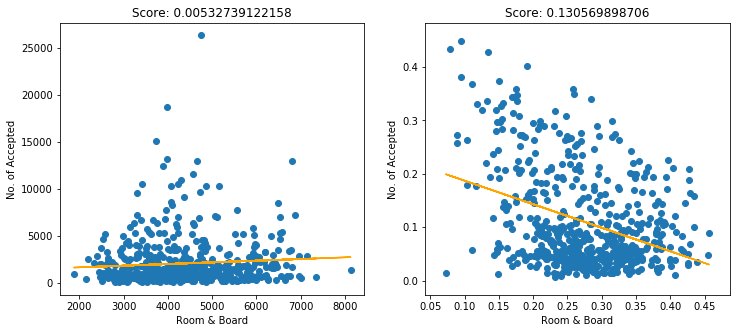

In [7]:
# No. of accepted v.s. $ room & board
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
LinearRegre(X, 'Room.Board', 'Accept')
plt.subplot(1,2,2)
LinearRegre(X0, 'Room.Board', 'Accept')
plt.show()

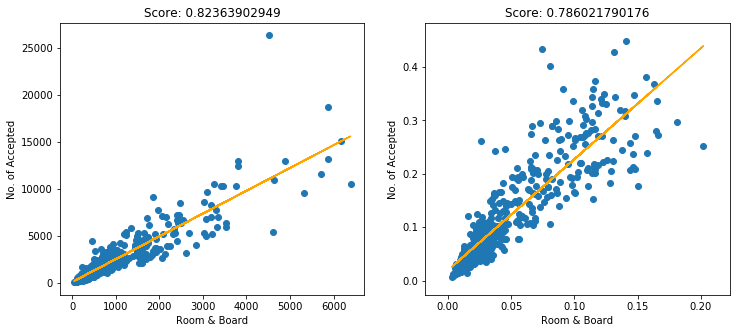

In [8]:
# No. of accepted v.s. No. of enrolled
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
LinearRegre(X, 'Enroll', 'Accept')
plt.subplot(1,2,2)
LinearRegre(X0, 'Enroll', 'Accept')
plt.show()

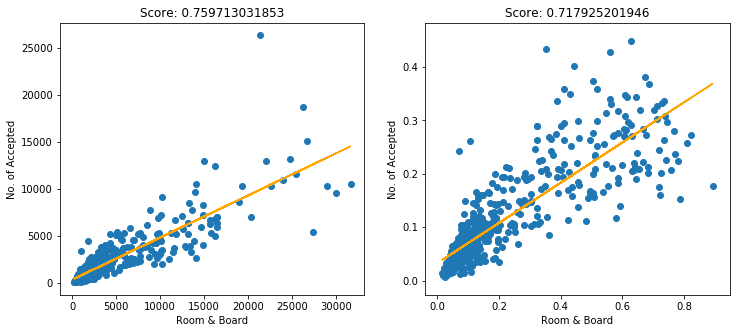

In [9]:
# No. of accepted v.s. No. of failed Undergrad
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
LinearRegre(X, 'F.Undergrad', 'Accept')
plt.subplot(1,2,2)
LinearRegre(X0, 'F.Undergrad', 'Accept')
plt.show()

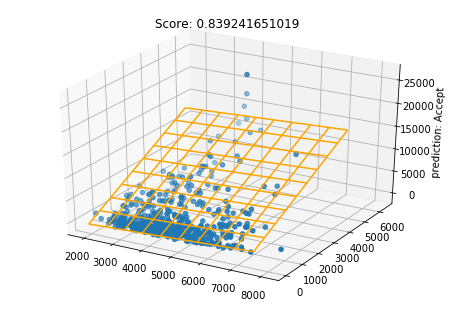

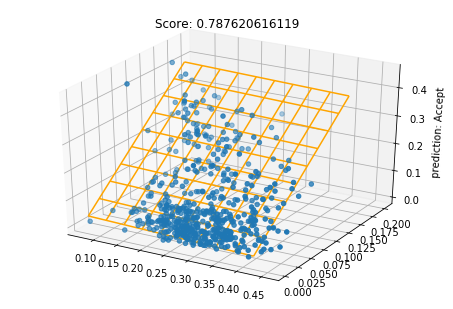

In [10]:
# No. of accepted v.s. Enrolled + RoomBoard
#LinearRegre(X, ['Room.Board','Enroll'], 'Accept')
LinearRegre(X, ['Room.Board','Enroll'], 'Accept')
plt.show()
LinearRegre(X0, ['Room.Board','Enroll'], 'Accept')
plt.show()